# Human Activity Recognition
#### By Nathan Lecompte (45423725)

The following code is for a human activity recognition IoT application, it utilises the 'DaLiAc' dataset which consists of data from 19 subjects (8 female and 11 male, age 26 ± 8 years, height 177 ± 11 cm, weight 75.2 ± 14.2 kg, mean ± standard deviation (SD)) that performed 13 daily life activities, including: sitting, lying, standing, washing dishes, vacuuming, sweeping, walking outside, ascending & descending stairs, treadmill running (8.3 km/h), bicycling (both at 50 watt & 100 watt), and rope jumping.



## Import packages

Before running any code, please ensure all the necessary Python packages are installed via pip, including:
 - **numpy**: `pip install numpy`
 - **pandas**: `pip install pandas`
 - **scipy**: `pip install scipy`
 - **matplotlib**: `pip install matplotlib`
 - **scikit-learn**: `pip install sklearn`

Once the above packages have been installed, import the packages by running the code block below (other code blocks will not run unless you run this one first):

In [5]:
# Import packages
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## 1.0 Load data

You will need to download the [DaLiAc database](https://mad-nas.cs.fau.de:8081/Research/ActivityNet/daliac.zip) and export all `dataset_x.txt` files into a folder named `datasets` within the same directory as this Jupyter Notebook.

The following code will load all datasets found within the `datasets` folder, the DaLiAc database contains 19 datasets (1 per person), therefore, only 19 dataset files are loaded (you may update this by modifying the range in the loop below). The first five rows and the last five rows of all combined datasets will be outputed after running this code.

In [3]:
'''
Load data for 19 people from datasets folder (one dataset per person)
'''
def load_data():
    # Load all datasets
    for i in range(1,20):
        df = pd.read_csv('datasets/dataset_%d.txt' % i, sep=',', header=None)
        print('Loaded dataset_%d.txt (%d rows)' % (i, len(df)))
    
    # Print blank line to separate load status
    print('') 
    
    # Return loaded data
    return df


# Call our load_data() function
load_data()

Loaded dataset_1.txt (245576 rows)
Loaded dataset_2.txt (301901 rows)
Loaded dataset_3.txt (245985 rows)
Loaded dataset_4.txt (248239 rows)
Loaded dataset_5.txt (254178 rows)
Loaded dataset_6.txt (224073 rows)
Loaded dataset_7.txt (261959 rows)
Loaded dataset_8.txt (231653 rows)
Loaded dataset_9.txt (248855 rows)
Loaded dataset_10.txt (242709 rows)
Loaded dataset_11.txt (240251 rows)
Loaded dataset_12.txt (254794 rows)
Loaded dataset_13.txt (246190 rows)
Loaded dataset_14.txt (244144 rows)
Loaded dataset_15.txt (241272 rows)
Loaded dataset_16.txt (255201 rows)
Loaded dataset_17.txt (239838 rows)
Loaded dataset_18.txt (229396 rows)
Loaded dataset_19.txt (230628 rows)



,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.74763,0.127970,0.68458,-2.7424,1.0334,-0.43340,-0.103060,-0.470570,0.865590,-7.8315,...,0.71558,-0.811260,-0.23322,-1.034800,-0.093851,-0.014343,0.87972,12.6530,-0.10648,1
1,-0.74373,0.095903,0.69275,-3.1086,1.7657,-0.43340,-0.091276,-0.466530,0.849510,-9.2962,...,1.44790,-0.078928,-0.23322,-1.038800,-0.078429,-0.033878,-0.58494,11.1880,-1.57110,1
2,-0.75154,0.119950,0.68867,-4.2071,1.7657,-0.79956,-0.103060,-0.462490,0.845490,-10.0290,...,2.18020,-0.078928,-0.23322,-1.026800,-0.093851,-0.010436,0.87972,11.1880,-0.10648,1
3,-0.73982,0.119950,0.68867,-4.2071,2.1319,-0.79956,-0.091276,-0.462490,0.841470,-9.6624,...,2.91260,0.653400,-0.23322,-1.026800,-0.089996,-0.018250,0.87972,12.6530,-0.10648,1
4,-0.74373,0.111940,0.70500,-4.5733,1.7657,-0.79956,-0.103060,-0.458450,0.853530,-8.5639,...,3.64490,1.019600,-0.59939,-1.034800,-0.101560,-0.010436,-3.51430,11.1880,1.35820,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230623,-0.32562,0.793310,-1.18190,-252.1000,256.6200,280.42000,-0.232640,0.078695,0.186110,269.3600,...,31.84000,-50.976000,93.13900,-0.050303,0.927830,-0.229230,21.38500,-28.3580,207.88000,13
230624,-0.44285,0.701130,-1.21050,-282.8600,263.5700,286.27000,-0.240490,0.220050,0.109720,270.0900,...,26.71300,-59.398000,94.60400,-0.022290,0.958680,-0.330810,8.20300,-13.7110,219.59000,13
230625,-0.52491,0.649020,-1.22680,-298.6000,268.7000,295.43000,-0.205150,0.381600,0.045393,253.2500,...,23.05200,-62.693000,93.87100,0.217820,0.796750,-0.112020,-0.58494,-4.9231,222.52000,13
230626,-0.61478,0.608940,-1.19420,-299.7000,272.7300,307.15000,-0.059862,0.490640,-0.022957,215.5300,...,20.85500,-59.764000,91.30800,0.137790,0.603980,-0.104200,-6.44360,6.7942,216.66000,13


## 2.0 Visualise data

The following code will visualise the sensor data (accelerometer & gyroscope) collected from the device located on the 'Wrist' for all 13 activities performed by all 19 subjects within the DaLiAc database.

Loaded dataset_1.txt (245576 rows)
Loaded dataset_2.txt (301901 rows)
Loaded dataset_3.txt (245985 rows)
Loaded dataset_4.txt (248239 rows)
Loaded dataset_5.txt (254178 rows)
Loaded dataset_6.txt (224073 rows)
Loaded dataset_7.txt (261959 rows)
Loaded dataset_8.txt (231653 rows)
Loaded dataset_9.txt (248855 rows)
Loaded dataset_10.txt (242709 rows)
Loaded dataset_11.txt (240251 rows)
Loaded dataset_12.txt (254794 rows)
Loaded dataset_13.txt (246190 rows)
Loaded dataset_14.txt (244144 rows)
Loaded dataset_15.txt (241272 rows)
Loaded dataset_16.txt (255201 rows)
Loaded dataset_17.txt (239838 rows)
Loaded dataset_18.txt (229396 rows)
Loaded dataset_19.txt (230628 rows)



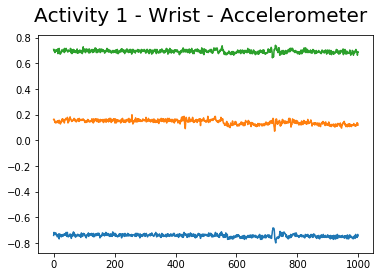

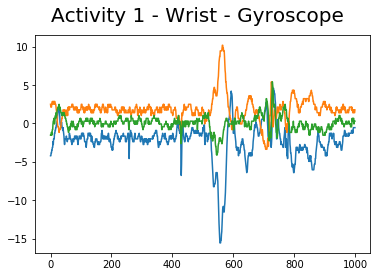

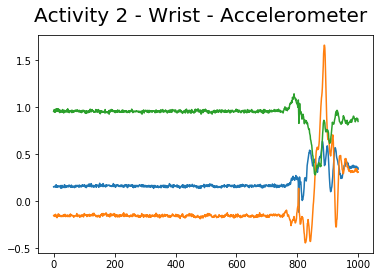

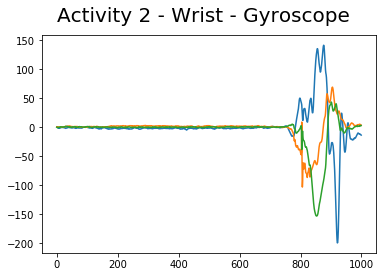

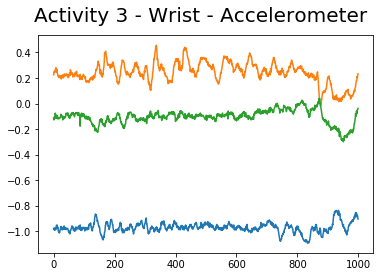

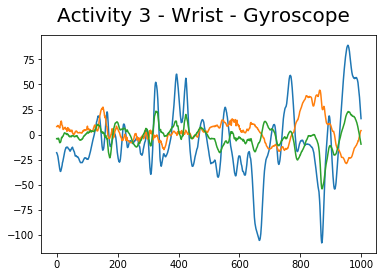

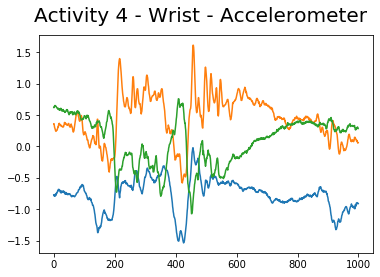

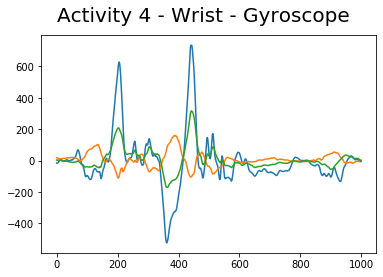

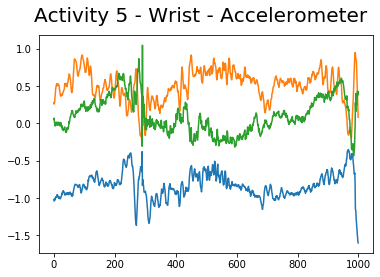

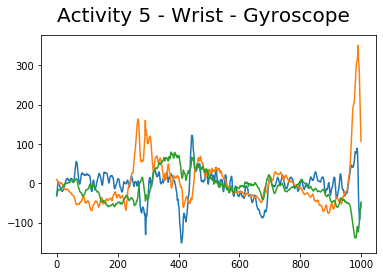

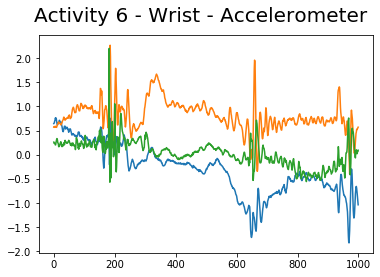

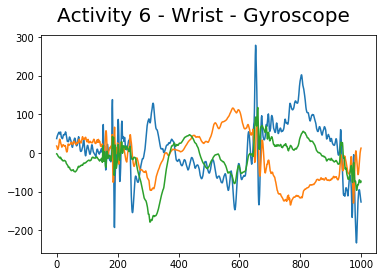

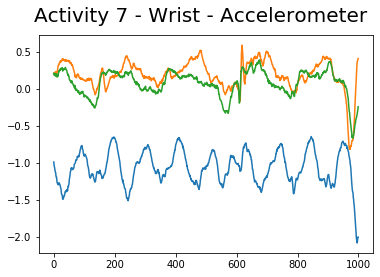

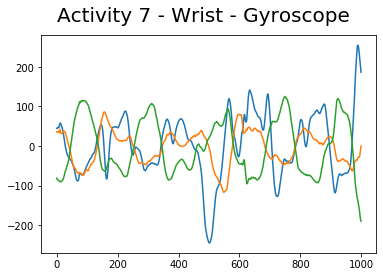

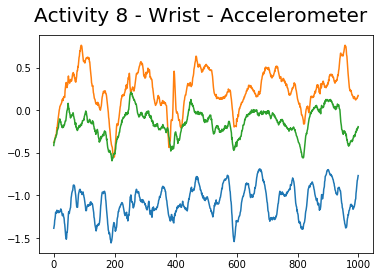

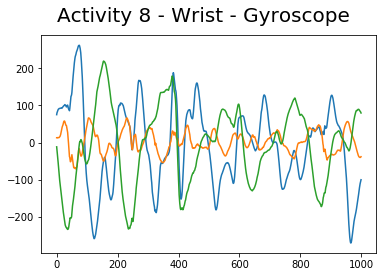

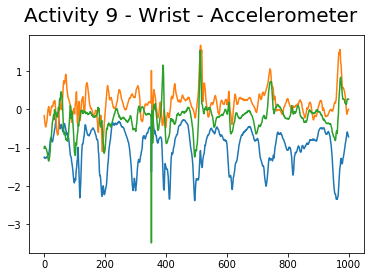

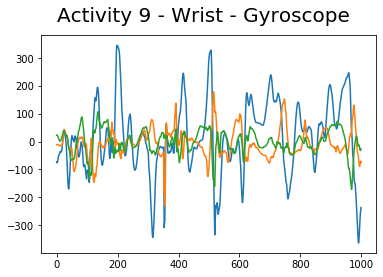

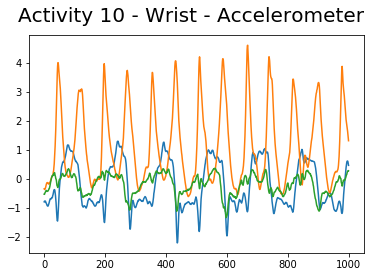

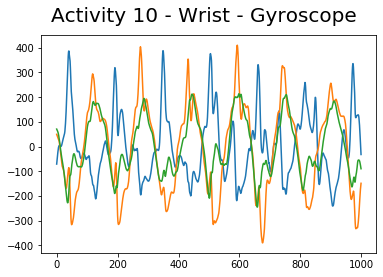

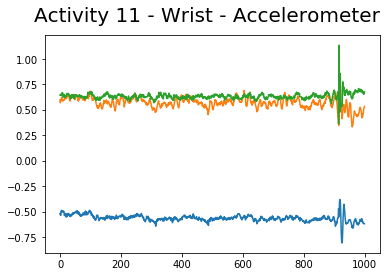

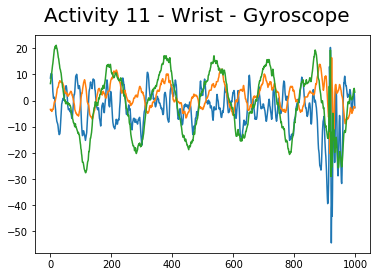

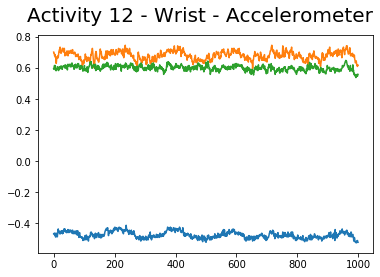

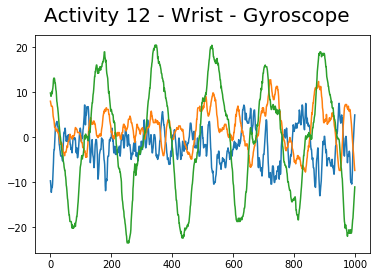

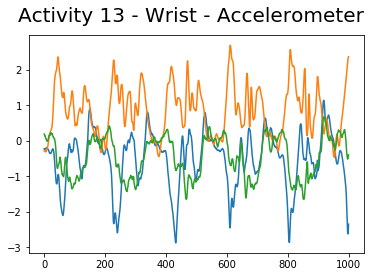

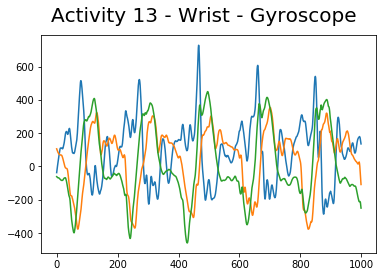

In [4]:
'''
Visualise Accelerometer & Gyroscope sensor data from the wrist device for all activities
'''
def visualize_data():
    # Load all datasets
    df = load_data()
    
    # Plot data for all activities
    for activity in range(1, 14):
        df_values = df[df[24] == activity].values
    
        # Plot Accelerometer sensor data (Wrist only)
        fig = plt.figure()
        plt.plot(df_values[500:1500, 0:3])
        fig.suptitle('Activity %d - Wrist - Accelerometer' % activity, fontsize=20)
        plt.show()

        # Plot Gyroscope sensor data (Wrist only)
        fig = plt.figure()
        plt.plot(df_values[500:1500, 3:6])
        fig.suptitle('Activity %d - Wrist - Gyroscope' % activity, fontsize=20)
        plt.show()
        
        # Print blank line to separate each activity
        print('')


# Call our visualize_data() function
visualize_data()

## 3.0 Filter data

The following code applies a 'lowpass' Butterworth filter to the sensor data (accelerometer & gyroscope) collected from the device located on the 'Wrist' for all 13 activities performed by all 19 subjects within the DaLiAc database in order to remove noise. Once the filter is applied the filtered data will be visualised in the output (you can compare this to the output of the code block above to see the change in noise).

Loaded dataset_1.txt (245576 rows)
Loaded dataset_2.txt (301901 rows)
Loaded dataset_3.txt (245985 rows)
Loaded dataset_4.txt (248239 rows)
Loaded dataset_5.txt (254178 rows)
Loaded dataset_6.txt (224073 rows)
Loaded dataset_7.txt (261959 rows)
Loaded dataset_8.txt (231653 rows)
Loaded dataset_9.txt (248855 rows)
Loaded dataset_10.txt (242709 rows)
Loaded dataset_11.txt (240251 rows)
Loaded dataset_12.txt (254794 rows)
Loaded dataset_13.txt (246190 rows)
Loaded dataset_14.txt (244144 rows)
Loaded dataset_15.txt (241272 rows)
Loaded dataset_16.txt (255201 rows)
Loaded dataset_17.txt (239838 rows)
Loaded dataset_18.txt (229396 rows)
Loaded dataset_19.txt (230628 rows)



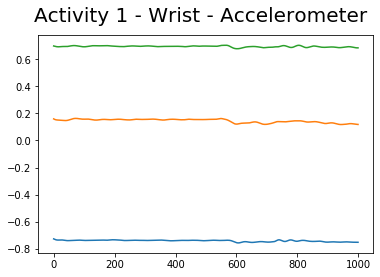

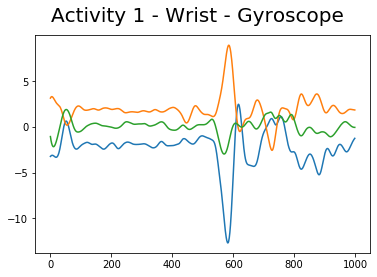

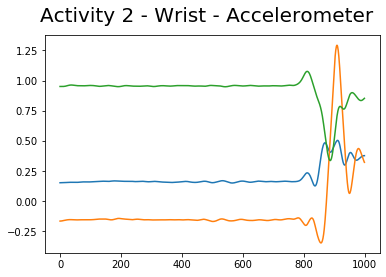

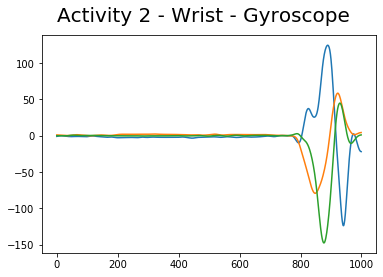

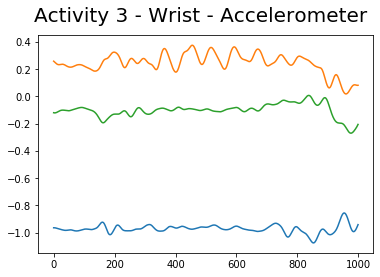

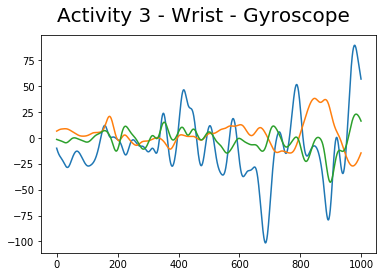

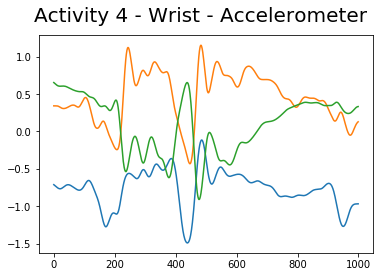

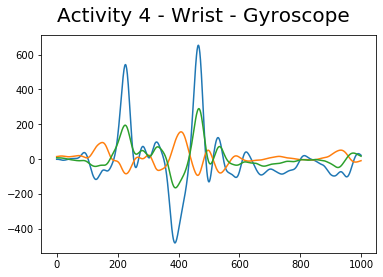

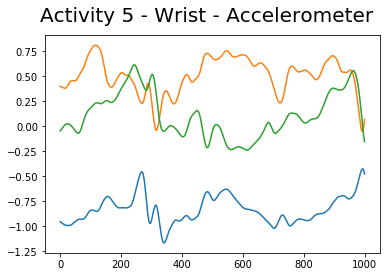

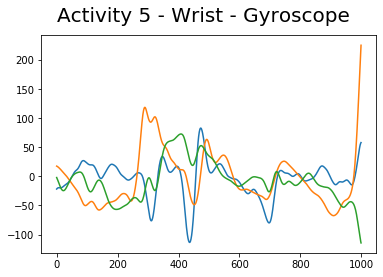

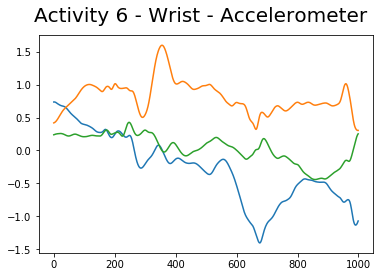

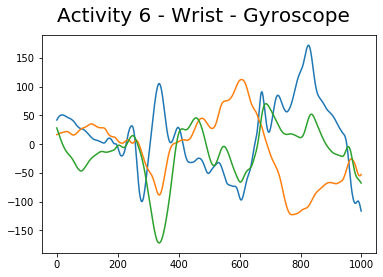

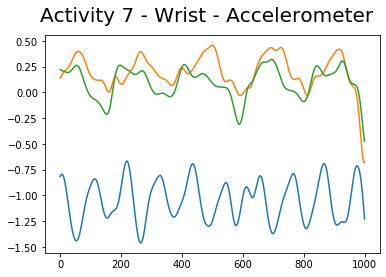

In [ ]:
'''
Apply Butterworth filter to data from Accelerometer & Gryroscope sensors for sitting & lying activities
'''
def filter_data():
    # Load all datasets
    df = load_data()
    
    # Create Lowpass Butterworth filter for noise removal
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    
    # Remove noise from all activity data using Lowpass Butterworth filter
    for activity in range(1, 14):
        df_values = df[df[24] == activity].values

        # Filter Accelerometer sensor data (Wrist only)
        for i in range(0, 3):
            df_values[:, i] = signal.lfilter(b, a, df_values[:, i])

        # Filter Gyroscope sensor data (Wrist only)
        for i in range(3, 6):
            df_values[:, i] = signal.lfilter(b, a, df_values[:, i])
    
        # Plot Accelerometer sensor data (Wrist only)
        fig = plt.figure()
        plt.plot(df_values[500:1500, 0:3])
        fig.suptitle('Activity %d - Wrist - Accelerometer' % activity, fontsize=20)
        plt.show()

        # Plot Gyroscope sensor data (Wrist only)
        fig = plt.figure()
        plt.plot(df_values[500:1500, 3:6])
        fig.suptitle('Activity %d - Wrist - Gyroscope' % activity, fontsize=20)
        plt.show()
        
        # Print blank line to separate each activity
        print('')
    

# Call our filter_data() function
filter_data()